In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [2]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

In [31]:
# Plot the function and the derivatives
x = np.linspace(-50, 65, 1000)
y = f(x)
y_dash = Df(x)
y_ddash = [DDf(x)]*len(x)

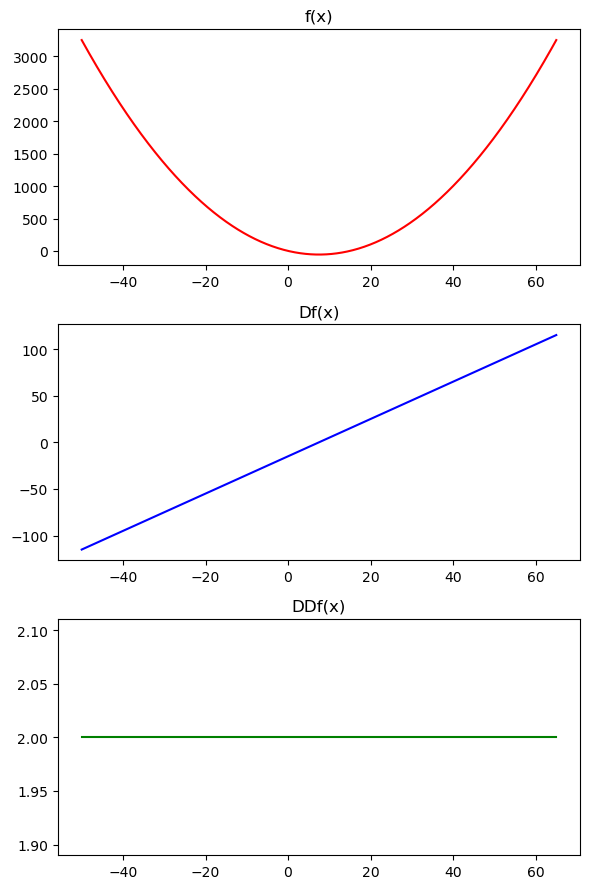

In [33]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 9))

# 1st
ax1.plot(x, y, color='red')
ax1.set_title('f(x)')

# 2nd
ax2.plot(x, y_dash, color='blue')
ax2.set_title('Df(x)')

# 3rd
ax3.plot(x, y_ddash, color='green')
ax3.set_title('DDf(x)')

plt.tight_layout()
plt.show()

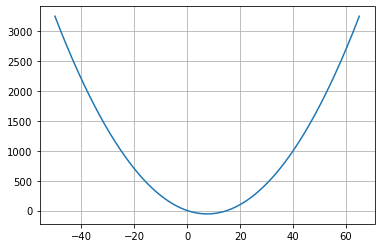

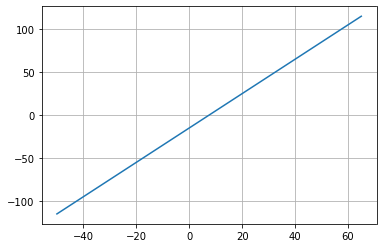

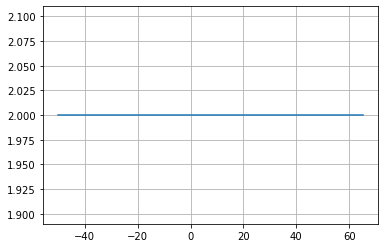

In [2]:
#answer

In [41]:
def gradient_descent(f, Df, x0, eps=1e-6, alpha=0.1, max_iters=1000):
    x = x0
    grad = Df(x)
    iters = 0
    while np.abs(grad) > eps and iters < max_iters:
        x = x - alpha * grad
        grad = Df(x)
        iters += 1
    return x, grad, iters

def newton_method(f, Df, DDf, x0, eps=1e-6, max_iters=1000,alpha=1):
    x = x0
    grad = Df(x)
    iters = 0
    while np.abs(grad) > eps and iters < max_iters:
        x = x - alpha*(grad / DDf(x))
        grad = Df(x)
        iters += 1
    return x, grad, iters

In [42]:
gd_x, gd_grad, iters = gradient_descent(f, Df, x0=40,eps=0.1,alpha=0.01)
print(f"Gradient Descent\nIetrations:{iters}\nx_min:{gd_x}\nGradient:{gd_grad}\n")
nt_x, nt_grad, iters = newton_method(f, Df, DDf, x0=40, eps=0.1)
print(f"Newton's method\nIetrations:{iters}\nx_min:{nt_x}\nGradient:{nt_grad}")

Gradient Descent
Ietrations:321
x_min:7.549596800192111
Gradient:0.09919360038422198

Newton's method
Ietrations:1
x_min:7.5
Gradient:0.0


In [6]:
#answer
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1

GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [7]:
#answer
# Newton's method without learning rate, x0=40, epsilon = 0.1

Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [43]:
nt_x, nt_grad, iters = newton_method(f, Df, DDf, x0=40, eps=0.1, alpha=0.8)
print(f"Newton's method\nIetrations:{iters}\nx_min:{nt_x}\nGradient:{nt_grad}")

Newton's method
Ietrations:5
x_min:7.5104
Gradient:0.020799999999999486


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1

Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

In [54]:
def gradient_descent(f, Df, x0, alpha, eps, max_iters):
    x = x0
    for i in range(max_iters):
        grad_val = Df(x)
        if np.linalg.norm(grad_val) < eps:
            break
        x = x - alpha * grad_val
    return x, grad_val, i

def newton_method(f, Df, DDf, x0, eps, max_iters,alpha=1):
    x = x0
    for i in range(max_iters):
        grad_val = Df(x)
        if np.linalg.norm(grad_val) < eps:
            break
        hess_val = DDf(x)
        x = x - alpha*(np.linalg.inv(hess_val) @ grad_val)
    return x, grad_val, i

In [55]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

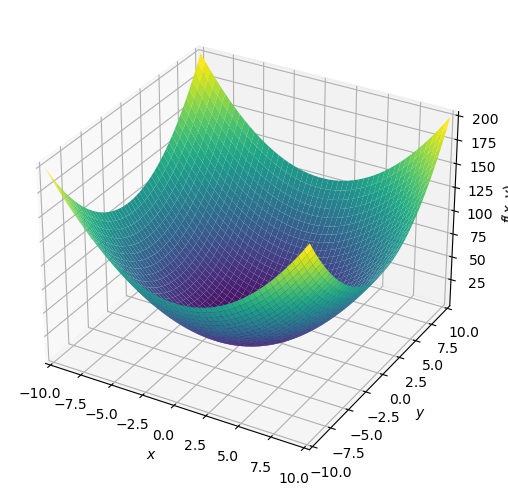

In [56]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(5,7))
plt.show()

In [57]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [61]:
#function 1 with Gradient Descent, alpha = 0.1
print("Testing function 1 with Gradient Descent\n")
gd_x, gd_grad, iters = gradient_descent(f_1, Df_1, x0=np.array([10, 10]), alpha=0.1, eps=0.001, max_iters=1000)
print(f"Gradient descent with alpha = 0.1\nIetrations:{iters}\nx_min:{gd_x}\nGradient:{gd_grad}\n\n")


#function 1 with Gradient Descent, alpha = 0.5
gd_x, gd_grad, iters = gradient_descent(f_1, Df_1, x0=np.array([10, 10]), alpha=0.5, eps=0.001, max_iters=1000)
print(f"Gradient descent with alpha = 0.5\nIetrations:{iters}\nx_min:{gd_x}\nGradient:{gd_grad}\n\n")


#function 1 with Newton's Method without alpha
print("Testing function 1 with Newton's Method\n")
nt_x, nt_grad, iters = newton_method(f_1, Df_1, DDf_1, x0=np.array([10, 10]), eps=0.001, max_iters=1000)
print(f"Newton's method without alpha\nIetrations:{iters}\nx_min:{nt_x}\nGradient:{nt_grad}\n\n")


#function 1 with Newton's Method, alpha = 0.5
print("Testing function 1 with Newton's Method:")
nt_x, nt_grad, iters = newton_method(f_1, Df_1, DDf_1, x0=np.array([10, 10]), alpha=0.5, eps=0.001, max_iters=1000)
print(f"Newton's method with alpha=0.5\nIetrations:{iters}\nx_min:{nt_x}\nGradient:{nt_grad}")

Testing function 1 with Gradient Descent

Gradient descent with alpha = 0.1
Ietrations:46
x_min:[0.00034845 0.00034845]
Gradient:[0.0006969 0.0006969]


Gradient descent with alpha = 0.5
Ietrations:1
x_min:[0. 0.]
Gradient:[0. 0.]


Testing function 1 with Newton's Method

Newton's method without alpha
Ietrations:1
x_min:[0. 0.]
Gradient:[0. 0.]


Testing function 1 with Newton's Method:
Newton's method without alpha
Ietrations:15
x_min:[0.00030518 0.00030518]
Gradient:[0.00061035 0.00061035]


In [17]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


In [18]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [19]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [20]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001



Found solution after 15 iterations.
xy_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

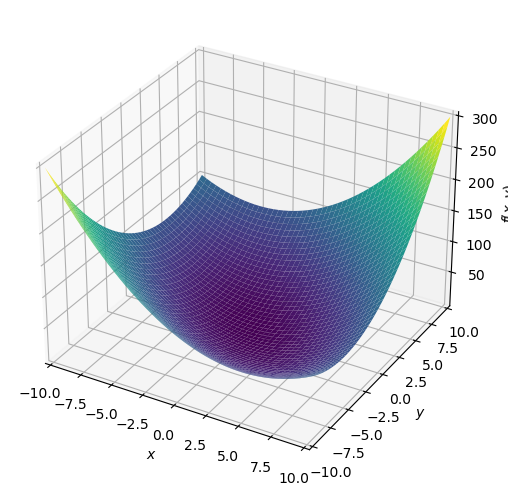

In [62]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(5,7))
plt.show()

In [63]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [64]:
#function 1 with Gradient Descent, alpha = 0.5
print("Testing function 2 with Gradient Descent\n")
gd_x, gd_grad, iters = gradient_descent(f_2, Df_2, x0=np.array([10, 10]), alpha=0.5, eps=0.001, max_iters=1000)
print(f"Gradient descent with alpha = 0.5\nIetrations:{iters}\nx_min:{gd_x}\nGradient:{gd_grad}\n\n")


#function 1 with Newton's Method without alpha
print("Testing function 2 with Newton's Method\n")
nt_x, nt_grad, iters = newton_method(f_2, Df_2, DDf_2, x0=np.array([10, 10]), eps=0.001, max_iters=1000)
print(f"Newton's method without alpha\nIetrations:{iters}\nx_min:{nt_x}\nGradient:{nt_grad}\n\n")


#function 1 with Newton's Method, alpha = 0.9
print("Testing function 1 with Newton's Method:")
nt_x, nt_grad, iters = newton_method(f_2, Df_2, DDf_2, x0=np.array([10, 10]), alpha=0.9, eps=0.001, max_iters=1000)
print(f"Newton's method with alpha = 0.9\nIetrations:{iters}\nx_min:{nt_x}\nGradient:{nt_grad}")

Testing function 2 with Gradient Descent

Gradient descent with alpha = 0.5
Ietrations:16
x_min:[0.00015259 0.00015259]
Gradient:[0.00045776 0.00045776]


Testing function 2 with Newton's Method

Newton's method without alpha
Ietrations:1
x_min:[0. 0.]
Gradient:[0. 0.]


Testing function 1 with Newton's Method:
Newton's method with alpha = 0.9
Ietrations:5
x_min:[1.e-04 1.e-04]
Gradient:[0.0003 0.0003]


In [21]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [22]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001



Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [23]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min = [0.0001 0.0001]
Gradient = [0.0003 0.0003]


$𝒇(𝒙)=𝒙^𝟐y$ 

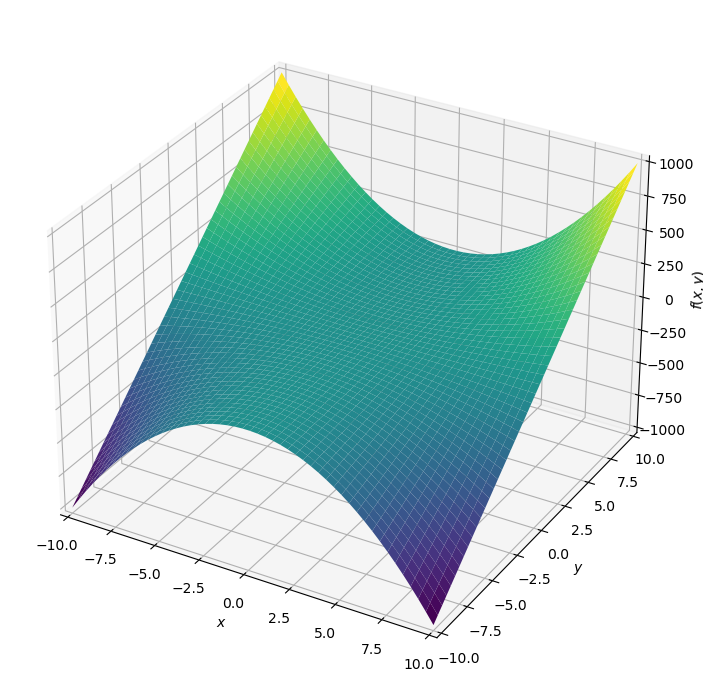

In [65]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [66]:
f_3 = lambda x: x**2 * y
Df_3 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_3 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [67]:
#function 1 with Gradient Descent, alpha = 0.01
print("Testing function 3 with Gradient Descent\n")
gd_x, gd_grad, iters = gradient_descent(f_3, Df_3, x0=np.array([10, 10]), alpha=0.01, eps=0.001, max_iters=1000)
print(f"Gradient descent with alpha = 0.5\nIetrations:{iters}\nx_min:{gd_x}\nGradient:{gd_grad}\n\n")


#function 1 with Newton's Method without alpha
print("Testing function 3 with Newton's Method\n")
nt_x, nt_grad, iters = newton_method(f_3, Df_3, DDf_3, x0=np.array([10, 10]), eps=0.001, max_iters=1000)
print(f"Newton's method without alpha\nIetrations:{iters}\nx_min:{nt_x}\nGradient:{nt_grad}\n\n")

Testing function 3 with Gradient Descent

Gradient descent with alpha = 0.5
Ietrations:79
x_min:[6.80598421e-05 6.85061189e+00]
Gradient:[9.32503127e-04 4.63214210e-09]


Testing function 3 with Newton's Method

Newton's method without alpha
Ietrations:9
x_min:[0.01953125 0.01953125]
Gradient:[0.00076294 0.00038147]




In [25]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001


Found solution after 79 iterations.
xy_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


In [26]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [73]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [104]:
from numpy.linalg import inv

def bfgs(f, Df,x_neg1, x0, eps, max_iters=1000, alpha=1):
    # initialization
    x_prev = np.array(x_neg1)
    x = np.array(x0)
    B = np.eye(len(x))
    grad_x = np.array(Df(x))
    iterations = 0
    
    # main loop
    while np.linalg.norm(grad_x) > eps and iterations < max_iters:

        s = x - x_prev
        y = Df(x) - Df(x_prev)
        common_denominator = 1 / (np.dot(y,s))
        B = (np.identity(len(x)) - common_denominator*np.outer(s,y)) @ B @ (np.identity(len(x)) - common_denominator*np.outer(y,s)) + common_denominator*np.outer(s,s)
        print(f"iter:{iterations}\nB:{B}\n")
        # update gradient
        # calculate the direction
        d = -np.dot(B, grad_x)
        x_prev = x
        x = x + alpha * d
        grad_x = np.array(Df(x))
        iterations += 1
    
    return x, grad_x, iterations

In [105]:
# test function f1
x_min, grad, iters = bfgs(f_1, Df_1, x_neg1=(10,10), x0=(9,9), eps=0.001)
print("Minimum of f(x,y) = x^2 + y^2:", x_min, "\nIterations:", iters, "\nGradient", grad)

iter:0
B:[[ 0.75 -0.25]
 [-0.25  0.75]]

Minimum of f(x,y) = x^2 + y^2: [0. 0.] 
Iterations: 1 
Gradient [0. 0.]


In [28]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 1 iterations.
xy_min = [[0.]
 [0.]]
Gradient = [[0.]
 [0.]]


In [106]:
# test function f1 with alpha 0.9
x_min, grad, iters = bfgs(f_1, Df_1, x_neg1=(10,10), x0=(9,9), eps=0.001, alpha=0.9)
print("Minimum of f(x,y) = x^2 + y^2:", x_min, "\nIterations:", iters, "\nGradient", grad)

iter:0
B:[[ 0.75 -0.25]
 [-0.25  0.75]]

iter:1
B:[[ 0.75 -0.25]
 [-0.25  0.75]]

iter:2
B:[[ 0.75 -0.25]
 [-0.25  0.75]]

iter:3
B:[[ 0.75 -0.25]
 [-0.25  0.75]]

iter:4
B:[[ 0.75 -0.25]
 [-0.25  0.75]]

Minimum of f(x,y) = x^2 + y^2: [9.e-05 9.e-05] 
Iterations: 5 
Gradient [0.00018 0.00018]


In [29]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.2545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715653


In [107]:
# test function f2
x_min, grad, iters = bfgs(f_2, Df_2, x_neg1=(10,10), x0=(9,9), eps=0.001)
print("Minimum of f(x,y) = x^2 + xy + y^2:", x_min, "\nIterations:", iters, "\nGradient", grad)

iter:0
B:[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

Minimum of f(x,y) = x^2 + xy + y^2: [1.77635684e-15 1.77635684e-15] 
Iterations: 1 
Gradient [5.32907052e-15 5.32907052e-15]


In [30]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 1 iterations.
xy_min = [[1.77635684e-15]
 [1.77635684e-15]]
Gradient = [[5.32907052e-15]
 [5.32907052e-15]]


In [108]:
# test function f2 with alpha 0.9
x_min, grad, iters = bfgs(f_2, Df_2, x_neg1=(10,10), x0=(9,9), eps=0.001, alpha=0.9)
print("Minimum of f(x,y) = x^2 + xy + y^2:", x_min, "\nIterations:", iters, "\nGradient", grad)

iter:0
B:[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

iter:1
B:[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

iter:2
B:[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

iter:3
B:[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

iter:4
B:[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]

Minimum of f(x,y) = x^2 + xy + y^2: [9.e-05 9.e-05] 
Iterations: 5 
Gradient [0.00027 0.00027]


In [31]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.0038183766184073705
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.00

In [109]:
# test function f3 
x_min, grad, iters = bfgs(f_3, Df_3, x_neg1=(10,10), x0=(9,9), eps=0.001)
print("Minimum of f(x,y) = x^2y:", x_min, "\nIterations:", iters, "\nGradient", grad)

iter:0
B:[[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]

iter:1
B:[[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]

iter:2
B:[[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]

iter:3
B:[[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]

iter:4
B:[[ 0.33173333 -0.33493333]
 [-0.33493333  0.9984    ]]

iter:5
B:[[ 0.3986982  -0.26796846]
 [-0.26796846  1.06536487]]

iter:6
B:[[ 0.50821158 -0.15845509]
 [-0.15845509  1.17487824]]

iter:7
B:[[0.68468809 0.01802142]
 [0.01802142 1.35135476]]

iter:8
B:[[0.97067757 0.3040109 ]
 [0.3040109  1.63734424]]

iter:9
B:[[1.43314347 0.7664768 ]
 [0.7664768  2.09981013]]

iter:10
B:[[2.18159883 1.51493216]
 [1.51493216 2.84826549]]

iter:11
B:[[3.39252008 2.7258534 ]
 [2.7258534  4.05918673]]

iter:12
B:[[5.35189668 4.68523   ]
 [4.68523    6.01856332]]

Minimum of f(x,y) = x^2y: [0.01534004 0.01534004] 
Iterations: 13 
Gradient [0.00047063 0.00023532]


In [32]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332